In [1]:
'''
CWK2 feedback and solutions - 
when asking to comment on results, consider how varying dt effects the error and the y value (does it converge?, is dt proportioal to the error?)
'''
# Part a - Euler's method
import numpy as np

def euler(theta0, v0, dt, T):
    theta = [theta0]
    v = [v0]

    t = [0]
    while t[-1] < T:
        
        new_theta = theta[-1] + dt * v[-1]
        new_v = v[-1] - dt * np.sin(theta[-1])
        new_t = t[-1] + dt
        
        theta.append(new_theta)
        v.append(new_v)
        t.append(new_t)
    
    return theta, v, t

In [2]:
# part b- Testing your implemenetation
'''
Make sure axes and all plot lines are labelled
'''
from matplotlib import pyplot as plt

def plot_xy(theta, *args, **kwargs):
    x = np.sin(theta)
    y = -np.cos(theta)
    
    plt.plot(x, y, *args, **kwargs)
    plt.axis('equal')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.grid(True)

def maxima_index(l):
    """
    Find all indicies of local maxima along a sequence.
    """
    m = []
    for i in range(1, len(l)-1):
        if l[i] > l[i-1] and l[i] > l[i+1]:
            m.append(i)
    return m
    
def plot_ttheta(t, theta, maxima=False, *args, **kwargs):
    l = plt.plot(t, theta, *args, **kwargs)
    
    if maxima:
        m = maxima_index(theta)
        for i in range(len(m)-1):
            index = m[i]
            next_index = m[i+1]
            plt.plot([t[index], t[next_index], t[next_index]],
                     [theta[index], theta[index], theta[next_index]], '.--', color=l[0].get_color())
    
    plt.xlabel('$t$')
    plt.ylabel(r'$\theta$')
    plt.grid(True)

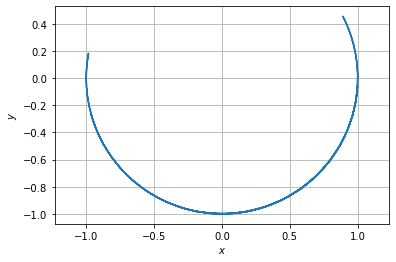

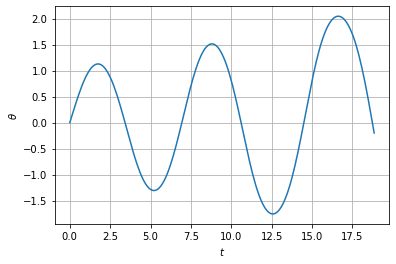

In [3]:
# The x-yplot should show some arc of a circle. The t-θ plot should show the periodic swinging of the pendulum with the maximum amplitude increasing.
dt = 6*np.pi/200
theta, v, t = euler(0, 1.0, dt, 6*np.pi)

plt.figure(1)
plot_xy(theta)

plt.figure(2)
plot_ttheta(t, theta)

plt.show()

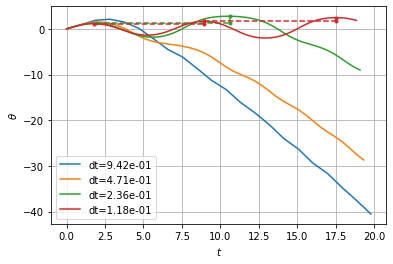

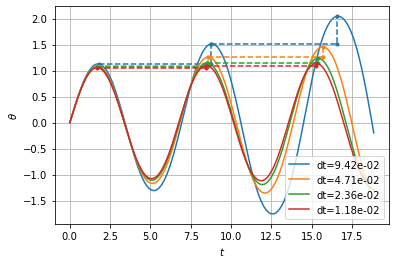

dt=9.424778e-02	max(theta)=2.0443243805486557	abs(max(theta) - theta_star)=9.971268e-01
dt=9.424778e-03	max(theta)=1.1188247724813452	abs(max(theta) - theta_star)=7.162722e-02
dt=9.424778e-04	max(theta)=1.0541495898371140	abs(max(theta) - theta_star)=6.952039e-03
dt=9.424778e-05	max(theta)=1.0478906853298144	abs(max(theta) - theta_star)=6.931341e-04
dt=9.424778e-06	max(theta)=1.0472668440319348	abs(max(theta) - theta_star)=6.929284e-05


KeyboardInterrupt: 

In [4]:
# Convergence testing
dt_range_1 = [6 * np.pi / 20, 6 * np.pi / 40, 6 * np.pi / 80, 6 * np.pi / 160]
dt_range_2 = [6 * np.pi / 200, 6 * np.pi / 400, 6 * np.pi / 800, 6 * np.pi / 1600]

plt.figure(3)
for dt in dt_range_1:
    theta, v, t = euler(0, 1.0, dt, 6*np.pi)
    plot_ttheta(t, theta, maxima=True, label=f"{dt=:.2e}")
plt.legend()

plt.figure(31)
for dt in dt_range_2:
    theta, v, t = euler(0, 1.0, dt, 6*np.pi)
    plot_ttheta(t, theta, maxima=True, label=f"{dt=:.2e}")
plt.legend()

plt.show()  # maximums of theta are growing overtime.

# Making a comment - We see that as the time step decreases the solution converges to a periodic solution where the maximum values do not increase over time.
old_max_theta = None
dt = 6*np.pi/200
theta_star = np.pi/3
tol = 1.0e-4

# loop
while True:
    # run algorithm and print results
    theta, v, t = euler(0, 1.0, dt, 6*np.pi)
    print(f"{dt=:.6e}\t{max(theta)=:.16f}\t{abs(max(theta) - theta_star)=:.6e}")
    
    # stop loop if no change in max theta
    if old_max_theta is not None and abs(old_max_theta - max(theta)) < tol:
            break
    
    # set parameters for next iteration
    dt = dt / 10
    old_max_theta = max(theta)
    
    

In [ ]:
# table two
import pandas as pd

def make_table(method, dt_range, theta_star):
    error_old = None
    mean_old = None

    data = []
    headers = [r"$\mathrm{d}t$", r"max $\theta$", "Error", "Ratio (error)", "Maximum increase", "Ratio (maximum increase)"]
    for dt in dt_range:
        theta, v, t = method(0, 1.0, dt, 6*np.pi)
        error = abs(max(theta) - theta_star)
        
        m = maxima_index(theta)
        M = [theta[i] for i in m]
        M_diff = np.diff(M)
        try:
            mean = max(M_diff)
        except ValueError:
            mean = np.NaN

        if error_old is None:
            data.append([f"{dt:.4e}", f"{max(theta):f}", f"{error:e}", "---", f"{mean:e}", "---"])
        else:
            data.append([f"{dt:.4e}", f"{max(theta):f}", f"{error:e}", f"{error/error_old:f}", f"{mean:e}", f"{mean/mean_old:f}"])
        
        error_old = error
        mean_old = mean

    df = pd.DataFrame(data, columns=headers)
    return df.style.hide_index()

make_table(euler, dt_range_1 + dt_range_2, np.pi/3)

In [6]:
# Midpoint method

def midpoint(theta0, v0, dt, T):
    theta = [theta0]
    v = [v0]

    t = [0]
    while t[-1] < T:
        theta_half = theta[-1] + 0.5 * dt * v[-1]
        v_half = v[-1] - 0.5 * dt * np.sin(theta[-1])
        t_half = t[-1] + 0.5 * dt
        
        new_theta = theta[-1] + dt * v_half
        new_v = v[-1] - dt * np.sin(theta_half)
        new_t = t[-1] + dt
        
        theta.append(new_theta)
        v.append(new_v)
        t.append(new_t)
    
    return theta, v, t

old_max_theta = None
dt = 6*np.pi/200
theta_star = np.pi/3
tol = 1.0e-8


In [7]:
# Check if maxima converges

# loop
while True:
    # run algorithm and print results
    theta, v, t = midpoint(0, 1.0, dt, 6*np.pi)
    print(f"{dt=:.6e}\t{max(theta)=:.16f}\t{abs(max(theta) - theta_star)=:.6e}")
    
    # stop loop if no change in max theta
    if old_max_theta is not None and abs(old_max_theta - max(theta)) < tol:
            break
    
    # set parameters for next iteration
    dt = dt / 10
    old_max_theta = max(theta)

dt=9.424778e-02	max(theta)=1.0482138463747348	abs(max(theta) - theta_star)=1.016295e-03
dt=9.424778e-03	max(theta)=1.0471958870995977	abs(max(theta) - theta_star)=1.664097e-06
dt=9.424778e-04	max(theta)=1.0471975284263071	abs(max(theta) - theta_star)=2.277029e-08
dt=9.424778e-05	max(theta)=1.0471975509842701	abs(max(theta) - theta_star)=2.123275e-10
dt=9.424778e-06	max(theta)=1.0471975511955605	abs(max(theta) - theta_star)=1.037170e-12


In [8]:
make_table(midpoint, dt_range_1 + dt_range_2 + [6 * np.pi / 3200], np.pi/3)

NameError: name 'make_table' is not defined

In [ ]:
# plot

for dt in dt_range_1:
    theta, v, t = midpoint(0, 1.0, dt, 6*np.pi)
    plt.figure(4)
    plot_xy(theta, label=f"{dt=:.2e}")
    plt.figure(5)
    plot_ttheta(t, theta, maxima=True, label=f"{dt=:.2e}")
    
plt.figure(4)
plt.legend()
plt.figure(5)
plt.legend()

for dt in dt_range_2:
    theta, v, t = midpoint(0, 1.0, dt, 6*np.pi)
    plt.figure(41)
    plot_xy(theta, label=f"{dt=:.2e}")
    plt.figure(51)
    plot_ttheta(t, theta, maxima=True, label=f"{dt=:.2e}")
    
plt.figure(41)
plt.legend()
plt.figure(51)
plt.legend()

plt.show()

In [ ]:
# Comments
'''
maxima of θ do grow over time for the midpoint method, but very slowly, and almost not at all if dt is small enough.
maxima converge with error proportial to dt squared which is the same as the order of convergence for the full method
'''